In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from patsy.builtins import *

In [2]:
gdp_le = pd.read_csv("../data/gdp_le.csv")
gdp_le.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


Start by fitting a linear regression model with target being life expectancy and predictor variable year.

<b>a. What coefficients do you get? Interpret the meaning of these coefficents.</b>

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

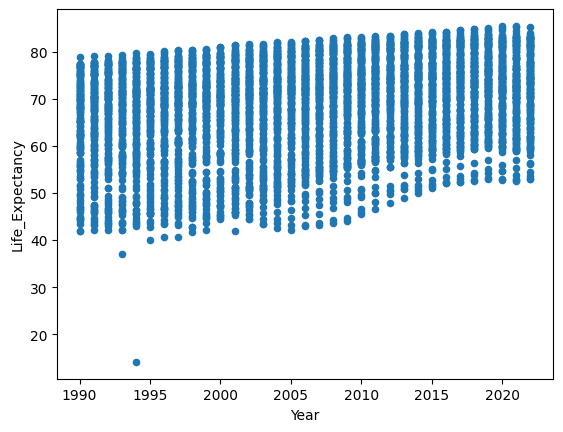

In [11]:
gdp_le.plot(kind='scatter', x='Year', y='Life_Expectancy')

In [6]:
import statsmodels.formula.api as smf

In [7]:
lr_life_expectancy = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

In [10]:
lr_life_expectancy.params

Intercept   -468.138140
Year           0.267722
dtype: float64

The negative intercept doesn't make sense here because life expecntancy will not be in negative. Interpretting the coefficient will be difficult in this case


<b>b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?</b>


In [23]:
lr_life_expectancy_mod = smf.ols("Life_Expectancy ~ I(Year - 1990)", data=gdp_le).fit()

In [24]:
lr_life_expectancy_mod.params

Intercept         64.628889
I(Year - 1990)     0.267722
dtype: float64

Substituting these estimates into the model, we get

$$Mean(Life Expectnacy) = 64.628889 + 0.267722(Year)$$

The new coefficient is 0.268 which means that for a given year after 1990 the life expectancy is increaed by 0.267 year.
Lets look at some other parameter from the model.

In [25]:
lr_life_expectancy_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        18:59:07   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.308      0.000      64.148      65.110
I(Year - 1990)     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the P Value and confidence interval this relation is statistically signiifcant.
The P value is zero and the confidence interval doen't have zero.

<b>C. Compare the actual mean life expectancy per year to the model's estimate. How well does it do? </b>

In [26]:
mean_le = gdp_le['Life_Expectancy'].mean()

69.01011528644356

The mean life expectancy per year is more than the model's estimate. That means that the model has underestimated the
life expectnacy.
<br>




<b>d. Plot the actual values against your model's estimates for the mean life expectancy.</b>

In [45]:
pred_df = pd.DataFrame(
    {
        'Year': np.arange(gdp_le['Year'].min(), gdp_le['Year'].max()) #used np.arrange as year is whole number
    }
)

pred_df['mean_estimate'] = lr_life_expectancy_mod.predict(pred_df)

pred_df

,Year,mean_estimate
0,1990,64.628889
1,1991,64.896612
2,1992,65.164334
3,1993,65.432056
4,1994,65.699778
5,1995,65.967500
6,1996,66.235222
7,1997,66.502944
8,1998,66.770666
9,1999,67.038389


In [46]:
#verify the above model estimates
Year = 1
estimate = lr_life_expectancy_mod.params['Intercept'] + lr_life_expectancy_mod.params['I(Year - 1990)']*tail_l
estimate

64.62888940412682

Plot these estimates with original dataset

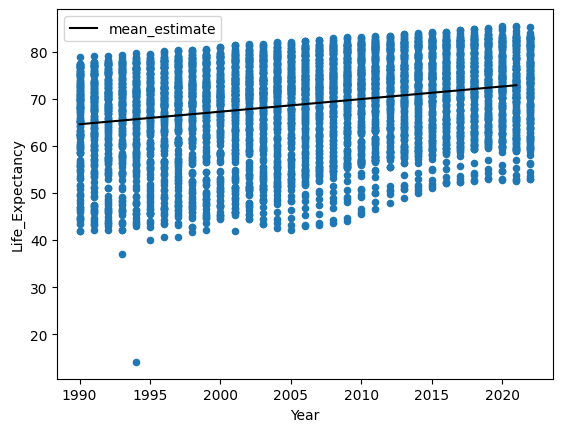

In [47]:
fig, ax = plt.subplots()
gdp_le.plot(kind="scatter", x="Year", y="Life_Expectancy", ax=ax)
pred_df.plot(kind="line", x="Year", y="mean_estimate", color="black", ax=ax);

<b>e. Inspect the R-squared value for the model. does it make sense, given the plot? </b>

The R-Squared values is 0.072 which is about 7.2% variability of life expectancy. The R-squared is very low from the model which raises questions on the strength of this relationship.


<b>2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.</b>


a. What coefficients do you get? Interpret the meaning of those coefficients.

b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?

c. Are the coefficients statistically significant?

d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? What about one whose gdp per capita is $100,000? e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?

In [58]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021]

In [59]:
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377
87,Angola,2021,5911.835657,Africa,61.643
120,Antigua and Barbuda,2021,19899.882425,North America,78.497
...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862
5377,Vanuatu,2021,2800.493866,Oceania,70.449
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473
5439,Zambia,2021,3236.788981,Africa,61.223


<b>. What coefficients do you get? Interpret the meaning of those coefficients.</b>

In [60]:
lr_le_gdp_capita = smf.ols("Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_2021).fit()

In [62]:
lr_le_gdp_capita.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

Substituting these estimates into the model, we get

$$Mean(Life Expectnacy) = 65.949870 + 0.000257(GDS Per capita)$$

Based on the coefficients it means that every unit change in GDP Per Capita, the life expectancy is 0.000257

In [65]:
gdp_le_2021['GDP_Per_Capita'].round()

0        1517.0
21      14596.0
54      11029.0
87       5912.0
120     19900.0
         ...   
5344     7801.0
5377     2800.0
5410     5641.0
5439     3237.0
5472     2115.0
Name: GDP_Per_Capita, Length: 173, dtype: float64